## ДЗ №1
## Панков Викентий

## 1. GC состав

In [2]:
from Bio import SeqIO
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

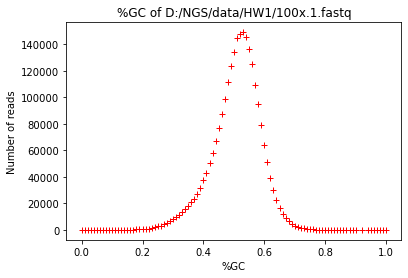

In [5]:
minQuality = 0

def sumCond(symbol, quality):
    if((quality < minQuality) or not (symbol=="G" or symbol=="C")):
        return 0
    return 1

def plotGC(fileName):
    fastqGen = SeqIO.parse(fileName, "fastq")
    gc = lambda x: sum([sumCond(x[0], x[1]) for x in list(zip(x.seq, x.letter_annotations["phred_quality"]))])

    gcCounts = list(map(lambda x: round(gc(x)/len(x.seq),2), fastqGen))
    
    gcHist = collections.Counter(gcCounts)
    (x,y) = list(gcHist.keys()), list(gcHist.values())

    plt.plot(x,y, 'r+')
    plt.title(f"%GC of {fileName}")
    plt.xlabel("%GC")
    plt.ylabel("Number of reads")

plotGC("D:/NGS/data/HW1/100x.1.fastq")

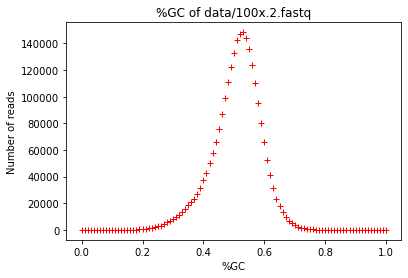

In [5]:
plotGC("D:/NGS/data/HW1/100x.2.fastq")

## 2. Распределение качества


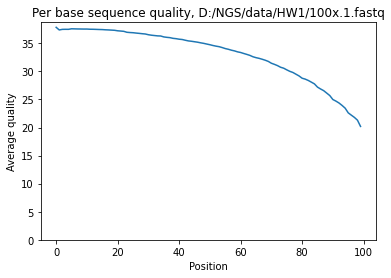

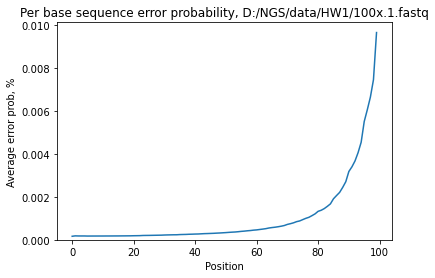

In [11]:
def plotQualityDist(fileName):
    fastqGen = SeqIO.parse(fileName, "fastq")
    qualities = list(map(lambda x: x.letter_annotations["phred_quality"], fastqGen))
    minReadLength = min(map(len, qualities))
    maxReadLength = max(map(len, qualities))
    qualitySums = np.zeros(maxReadLength)
    qualityCounts = np.zeros(maxReadLength)
    for qSeq in qualities:
        for position, quality in enumerate(qSeq):
            qualitySums[position]+=quality
            qualityCounts[position]+=1
    averageQualities = qualitySums/qualityCounts
    positions = np.array(range(0, maxReadLength))
    plt.figure()
    plt.plot(positions,averageQualities)
    plt.title(f"Per base sequence quality, {fileName}")
    plt.xlabel("Position")
    plt.ylim(0)
    plt.ylabel("Average quality")

    plt.figure()
    error_probabilities = 1/2* (1 - np.sqrt(1 - 4*np.exp(-1/10* averageQualities * (np.log(2) + np.log(5)))))
    plt.plot(positions,error_probabilities)
    plt.title(f"Per base sequence error probability, {fileName}")
    plt.xlabel("Position")
    plt.ylim(0)
    plt.ylabel("Average error prob")    


plotQualityDist("D:/NGS/data/HW1/100x.1.fastq")

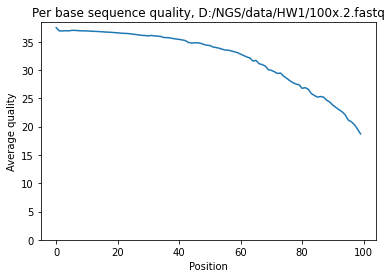

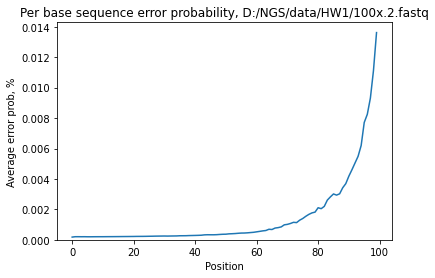

In [12]:
plotQualityDist("D:/NGS/data/HW1/100x.2.fastq")

## 2b. Вероятность ошибки в зависимости от позиции нуклеотида

## 3. Сравнение с FastQC

**%GC**

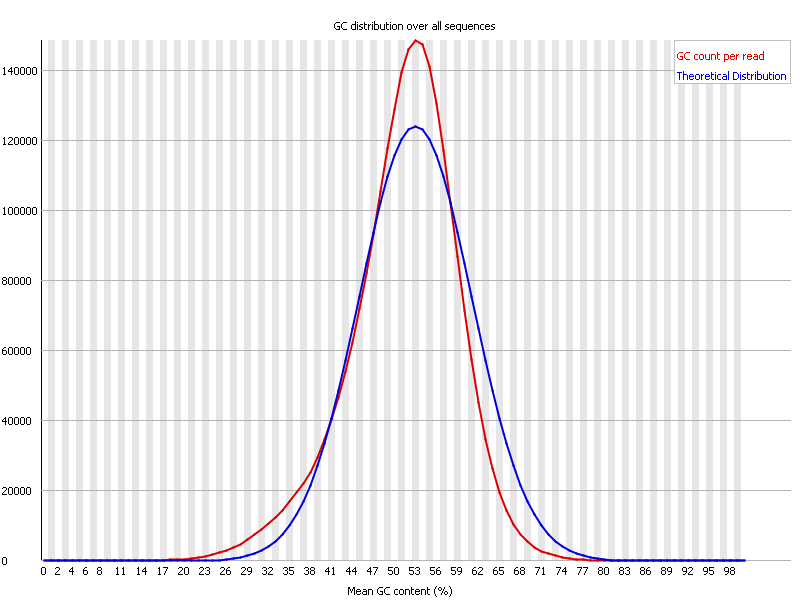

** Per base sequence quality **

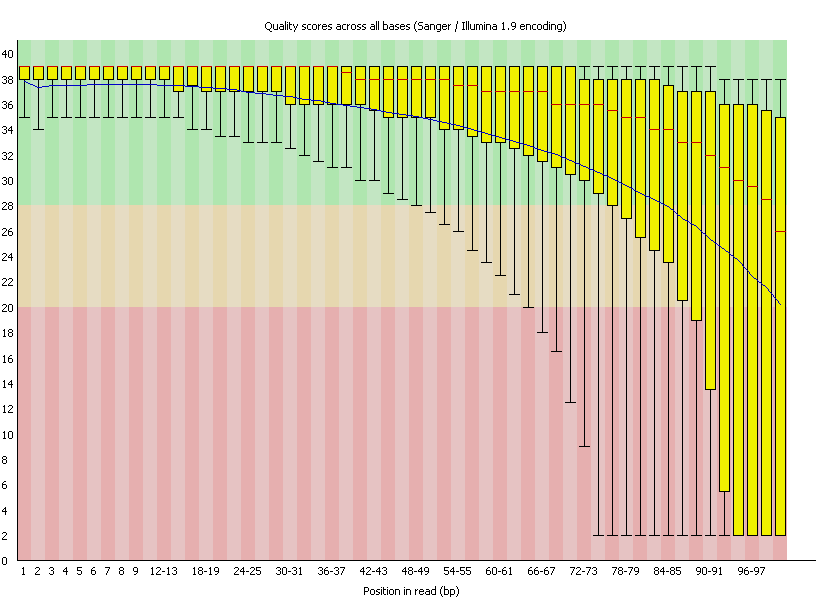


Графики очень похожи.